# Exploring Sentinel-2 images and farm plots

Run this notebook in Google Colab.

Reference: https://autogis-site.readthedocs.io/en/latest/lessons/Raster/overview.html

Sample region Sioma rectangle in Google Earth Engine:

`var roi = ee.Geometry.Polygon(
	[[[23.54012768643784, -16.640903064318362],
	[23.54012768643784, -16.698459584310598],
	[23.602269104894873, -16.698459584310598],
	[23.602269104894873, -16.640903064318362]]], null, false);`

## Setup

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


## Load farm plots

In [3]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 31.6 MB/s 
     |████████████████████████████████| 6.3 MB 44.8 MB/s 
     |████████████████████████████████| 16.7 MB 47.3 MB/s 


In [4]:
import geopandas as gpd

In [5]:
farm_plots = gpd.read_file('drive/MyDrive/farm_plot_detection/farm_plots_fixed/farm_plots_fixed_locations.shp')

In [6]:
farm_plots.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
farm_plots.shape

(1153, 2)

In [8]:
farm_plots.head()

,year,geometry
0,2017,"POLYGON Z ((23.36928 -17.64918 0.00000, 23.369..."
1,2017,"POLYGON Z ((23.36949 -17.64874 0.00000, 23.369..."
2,2017,"POLYGON Z ((23.42761 -17.61737 0.00000, 23.428..."
3,2017,"POLYGON Z ((23.41208 -17.59547 0.00000, 23.412..."
4,2017,"POLYGON Z ((23.41085 -17.59339 0.00000, 23.411..."


## Load sample Sentinel-2 image

In [28]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
import os
import numpy as np
import matplotlib.pyplot as plt

In [30]:
%matplotlib inline

In [31]:
data_dir = 'drive/MyDrive/farm_plot_detection/sample_images'
fp = os.path.join(data_dir, 'sample_region_sioma_april_2020.tif')

In [32]:
raster = rasterio.open(fp)
type(raster)

rasterio.io.DatasetReader

In [33]:
raster.crs

CRS.from_epsg(4326)

In [34]:
raster.transform

Affine(8.983152841195215e-05, 0.0, 23.540082525766824,
       0.0, -8.983152841195215e-05, -16.640841480672076)

In [35]:
raster.width, raster.height

(693, 642)

In [36]:
raster.count

23

In [37]:
raster.bounds

BoundingBox(left=23.540082525766824, bottom=-16.69851332191255, right=23.602335774956305, top=-16.640841480672076)

In [38]:
raster.driver

'GTiff'

In [39]:
raster.nodatavals

(None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None)

In [40]:
raster.meta

{'count': 23,
 'crs': CRS.from_epsg(4326),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 642,
 'nodata': None,
 'transform': Affine(8.983152841195215e-05, 0.0, 23.540082525766824,
       0.0, -8.983152841195215e-05, -16.640841480672076),
 'width': 693}

In [41]:
band1 = raster.read(1)
print(type(band1))
print(band1.dtype)

<class 'numpy.ndarray'>
float32


In [42]:
array = raster.read()

stats = []

for band in array:
    stats.append({
        'min': band.min(),
        'mean': band.mean(),
        'median': np.median(band),
        'max': band.max()
        })

stats

[{'max': 0.0991, 'mean': 0.037280474, 'median': 0.0364, 'min': 0.01295},
 {'max': 0.3483, 'mean': 0.04326916, 'median': 0.04075, 'min': 0.0108},
 {'max': 0.5091, 'mean': 0.06565929, 'median': 0.06345, 'min': 0.01155},
 {'max': 0.5043, 'mean': 0.06642963, 'median': 0.06065, 'min': 0.0087},
 {'max': 0.451, 'mean': 0.10716451, 'median': 0.1046, 'min': 0.00525},
 {'max': 0.44005, 'mean': 0.19573355, 'median': 0.2087, 'min': 0.00175},
 {'max': 0.50495, 'mean': 0.22816306, 'median': 0.24545, 'min': 0.003},
 {'max': 0.4945, 'mean': 0.22807065, 'median': 0.246, 'min': 0.0051},
 {'max': 0.48085, 'mean': 0.25113225, 'median': 0.2705, 'min': 0.00315},
 {'max': 0.40755, 'mean': 0.25072402, 'median': 0.26855, 'min': 0.00335},
 {'max': 0.6812, 'mean': 0.23745228, 'median': 0.2421, 'min': 0.00225},
 {'max': 0.8409, 'mean': 0.16305675, 'median': 0.1584, 'min': 0.00115},
 {'max': 0.0093, 'mean': 0.00866283, 'median': 0.00855, 'min': 0.0084},
 {'max': 0.4795, 'mean': 0.24464002, 'median': 0.24235, 'min'

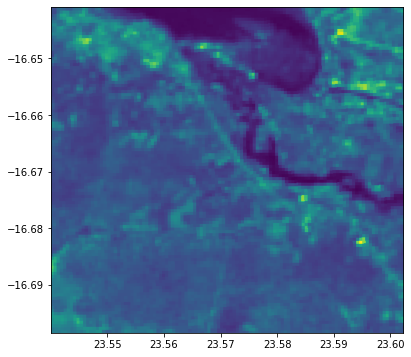

In [43]:
plt.figure(figsize=(10,6))
show((raster, 1))
plt.show()

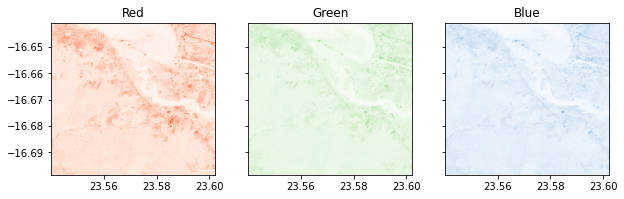

In [70]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(10,10), sharey=True)

show((raster, 4), cmap='Reds', ax=ax1)
show((raster, 3), cmap='Greens', ax=ax2)
show((raster, 2), cmap='Blues', ax=ax3)

ax1.set_title('Red')
ax2.set_title('Green')
ax3.set_title('Blue')

fig.show()

In [45]:
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

In [46]:
red = raster.read(4)
green = raster.read(3)
blue = raster.read(2)

red_normalized = normalize(red)
green_normalized = normalize(green)
blue_normalized = normalize(blue)

In [47]:
print('Normalized bands')
print(red_normalized.min(), '-', red_normalized.max(), 'mean:', red_normalized.mean())
print(green_normalized.min(), '-', green_normalized.max(), 'mean:', green_normalized.mean())
print(blue_normalized.min(), '-', blue_normalized.max(), 'mean:', blue_normalized.mean())

Normalized bands
0.0 - 1.0 mean: 0.116484314
0.0 - 1.0 mean: 0.10875145
0.0 - 1.0 mean: 0.09620494


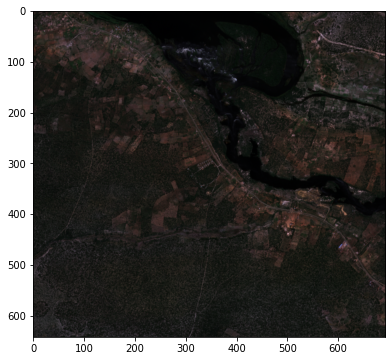

In [48]:
plt.figure(figsize=(10,6))
rgb = np.dstack((red_normalized, green_normalized, blue_normalized))
plt.imshow(rgb)
plt.show()

In [49]:
nir = raster.read(8)
nir_normalized = normalize(nir)

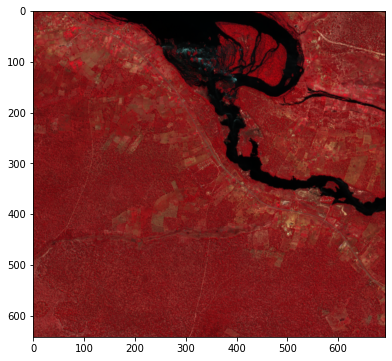

In [50]:
plt.figure(figsize=(10,6))
nrg = np.dstack((nir_normalized, red_normalized, green_normalized))
plt.imshow(nrg)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


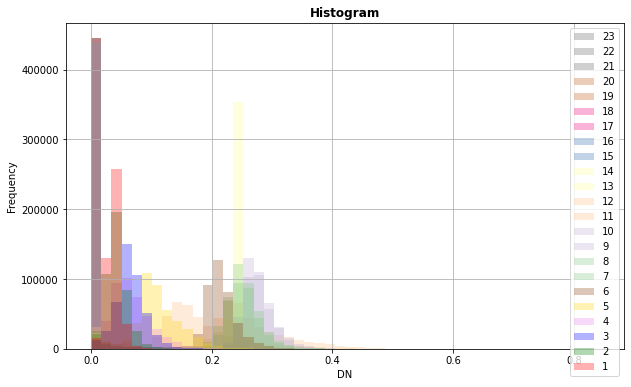

In [51]:
plt.figure(figsize=(10,6))
show_hist(raster, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title='Histogram')
plt.show()

## Calculate NDVI

In [54]:
red.mean()

0.06642963

In [52]:
red

array([[0.04925, 0.0343 , 0.0403 , ..., 0.0566 , 0.0934 , 0.09765],
       [0.06145, 0.04205, 0.04905, ..., 0.04585, 0.0881 , 0.0746 ],
       [0.07195, 0.0755 , 0.09715, ..., 0.05175, 0.0852 , 0.07885],
       ...,
       [0.1028 , 0.0889 , 0.08015, ..., 0.03825, 0.04095, 0.04605],
       [0.1025 , 0.08495, 0.0563 , ..., 0.05315, 0.0573 , 0.05905],
       [0.0895 , 0.08965, 0.0628 , ..., 0.0518 , 0.05835, 0.06035]],
      dtype=float32)

In [53]:
nir

array([[0.243  , 0.2566 , 0.26425, ..., 0.2337 , 0.264  , 0.2357 ],
       [0.24855, 0.2538 , 0.2655 , ..., 0.2364 , 0.2626 , 0.206  ],
       [0.2487 , 0.2571 , 0.26815, ..., 0.25115, 0.24625, 0.21465],
       ...,
       [0.2648 , 0.2472 , 0.2338 , ..., 0.26755, 0.2672 , 0.2611 ],
       [0.2686 , 0.24755, 0.2087 , ..., 0.29045, 0.2752 , 0.2567 ],
       [0.2719 , 0.2709 , 0.23085, ..., 0.2628 , 0.26015, 0.2481 ]],
      dtype=float32)

In [55]:
nir.mean()

0.22807065

In [56]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [57]:
ndvi = (nir - red) / (nir + red)

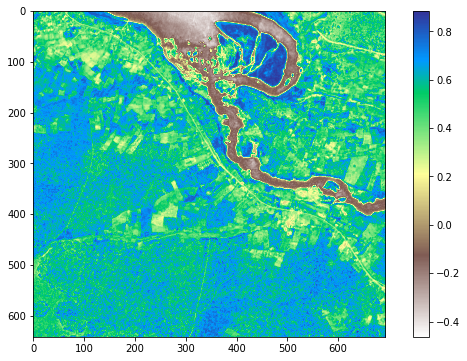

In [62]:
plt.figure(figsize=(10,6))
plt.imshow(ndvi, cmap='terrain_r')
plt.colorbar()
plt.show()

## Plot polygons on top of image

Which polygons are within the bounding box of the image?

In [73]:
raster.bounds

BoundingBox(left=23.540082525766824, bottom=-16.69851332191255, right=23.602335774956305, top=-16.640841480672076)

In [93]:
x_min = raster.bounds[0]
x_max = raster.bounds[2]
y_min = raster.bounds[1]
y_max = raster.bounds[3]

In [94]:
from shapely.geometry import box

In [95]:
bbox = box(x_min, y_min, x_max, y_max)

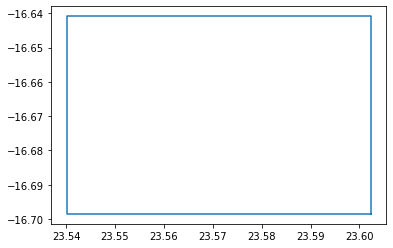

In [97]:
plt.plot(*bbox.exterior.xy)
plt.show()

In [98]:
from fiona.crs import from_epsg

In [100]:
bbox_df = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=from_epsg(4326))

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [102]:
bbox_df

,geometry
0,"POLYGON ((23.60234 -16.69851, 23.60234 -16.640..."


In [103]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [114]:
farm_plots['within_bbox'] = farm_plots.apply(lambda x: bbox.contains(x['geometry'].centroid), axis=1)

In [115]:
farm_plots

,year,geometry,within_bbox
0,2017,"POLYGON Z ((23.36928 -17.64918 0.00000, 23.369...",False
1,2017,"POLYGON Z ((23.36949 -17.64874 0.00000, 23.369...",False
2,2017,"POLYGON Z ((23.42761 -17.61737 0.00000, 23.428...",False
3,2017,"POLYGON Z ((23.41208 -17.59547 0.00000, 23.412...",False
4,2017,"POLYGON Z ((23.41085 -17.59339 0.00000, 23.411...",False
...,...,...,...
1148,2020,"POLYGON Z ((22.93942 -16.38973 0.00000, 22.939...",False
1149,2020,"POLYGON Z ((22.93479 -16.38802 0.00000, 22.934...",False
1150,2020,"POLYGON Z ((22.92467 -16.38498 0.00000, 22.925...",False
1151,2020,"POLYGON Z ((22.89518 -16.38077 0.00000, 22.895...",False


In [116]:
farm_plots[farm_plots['within_bbox'] == True]

,year,geometry,within_bbox
204,2017,"POLYGON Z ((23.54364 -16.64463 0.00000, 23.544...",True
205,2017,"POLYGON Z ((23.54461 -16.64442 0.00000, 23.545...",True
206,2017,"POLYGON Z ((23.54768 -16.64324 0.00000, 23.549...",True
209,2017,"POLYGON Z ((23.54124 -16.64453 0.00000, 23.541...",True
210,2017,"POLYGON Z ((23.54124 -16.64453 0.00000, 23.541...",True
...,...,...,...
1104,2020,"POLYGON Z ((23.57048 -16.66542 0.00000, 23.570...",True
1105,2020,"POLYGON Z ((23.55557 -16.64964 0.00000, 23.556...",True
1106,2020,"POLYGON Z ((23.55741 -16.64845 0.00000, 23.556...",True
1107,2020,"POLYGON Z ((23.54252 -16.64509 0.00000, 23.542...",True


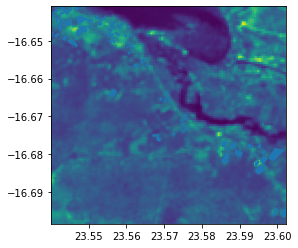

In [136]:
farm_plots[farm_plots['within_bbox'] == True].reset_index(drop=True)['geometry'].plot()
show((raster, 1))

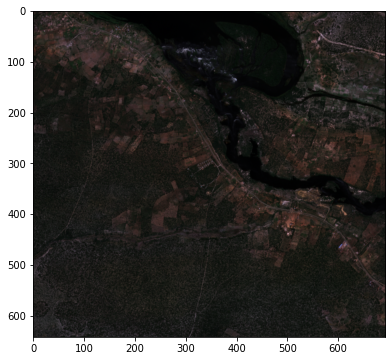

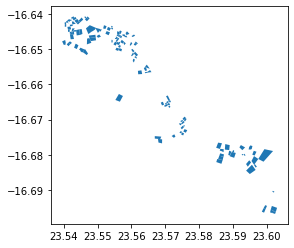

In [131]:
plt.figure(figsize=(10,6))
plt.imshow(rgb)
farm_plots[farm_plots['within_bbox'] == True].reset_index(drop=True)['geometry'].plot()
plt.show()